# Advanced Machine Learning Assignment 1: Predicting World Happiness
## Sofia Zaidman
## 2/6/23
### https://github.com/szaidman22/AdvancedML_WorldHappiness

# Loading data

In [1]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [2]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


# Explore bivariate results (Use visualizations!)
Describe any relationships you see between particular features and the target variable

In [3]:
full_train = pd.concat([X_train, y_train], axis=1, join="inner")


In [4]:
full_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Average,High,Low,Very High,Very Low
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,1,0,0,0,0
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,0,1,0,0,0
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,1,0,0,0,0
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,0,0,0,1,0
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,0,1,0,0,0


I'm undoing the one-hot encoding to be able to make some visualizations.

In [5]:
full_train['happiness'] = (full_train.iloc[:, 11:] == 1).idxmax(1)

In [6]:
full_train[full_train['happiness'] == "Average"].head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Average,High,Low,Very High,Very Low,happiness
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.0,1,0,0,0,0,Average
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.0,1,0,0,0,0,Average
10,Nigeria,0.696,1.111,0.245,0.426,0.215,0.041,Nigeria,Africa,Sub-Saharan Africa,1327.0,1,0,0,0,0,Average
17,Tajikistan,0.493,1.098,0.718,0.389,0.230,0.144,Tajikistan,Asia,Central Asia,6.0,1,0,0,0,0,Average
30,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.0,1,0,0,0,0,Average


In [7]:
def happiness_rank(value):
    if value == "Very Low":
        return 1
    if value == "Low":
        return 2
    elif value == "Average":
        return 3
    elif value == "High":
        return 4
    elif value == "Very High":
        return 5
 
full_train['happiness_level'] = full_train['happiness'].map(happiness_rank)


There appears to be a strong relationship between GDP per capita and happiness level, so this variable will definitely be used in my model.

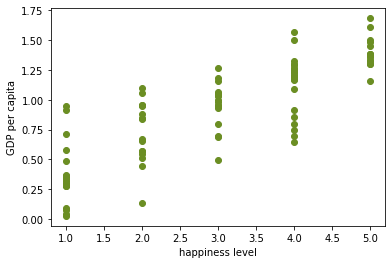

In [8]:
import matplotlib.pyplot as plt

plt.ylabel("GDP per capita")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['GDP per capita'], c = 'olivedrab')
plt.show()

Freedom to make life choices clearly does have an impact on happiness level especially among the happiest countries, but it doesn't make a massive difference accross the other 4 happiness levels. It might be worth leaving in but could also result in adding noise to the model.

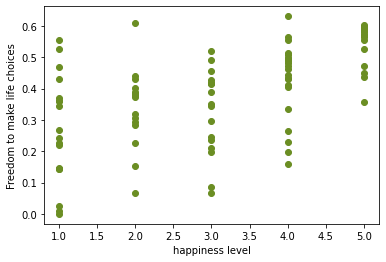

In [9]:
plt.ylabel("Freedom to make life choices")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Freedom to make life choices'], c = 'olivedrab')
plt.show()

There is also an obvious relationship between the social support variable and happiness level, so I will keep this in the model as well.

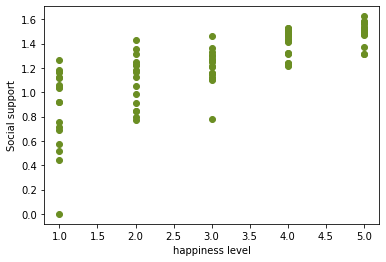

In [10]:
plt.ylabel("Social support")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Social support'], c = 'olivedrab')
plt.show()

Healthy life expectancy is definitely related to happiness level and I will use it in my model.

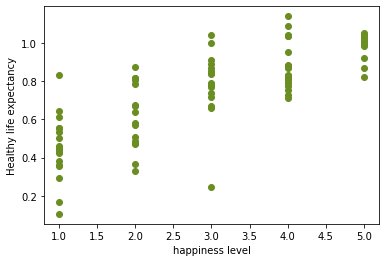

In [11]:
plt.ylabel("Healthy life expectancy")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Healthy life expectancy'], c = 'olivedrab')
plt.show()

Generosity seems like it might potentially just add noise to our prediction, could think about removing that variable.

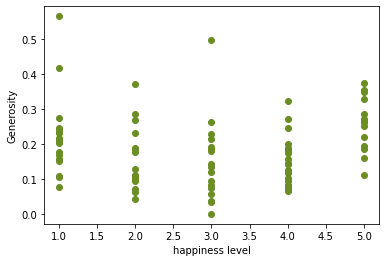

In [12]:
plt.ylabel("Generosity")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Generosity'], c = 'olivedrab')
plt.show()

The relationship between perceptions of corruption and happiness level is definitely not what I would have expected but interesting, even though there is a great deal of overlap with levels 1-4, still might want to keep in.

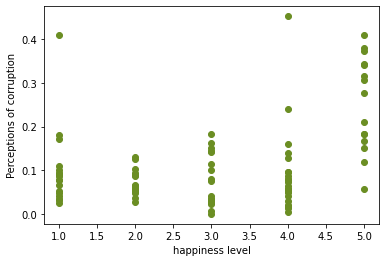

In [13]:
plt.ylabel("Perceptions of corruption")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Perceptions of corruption'], c = 'olivedrab')
plt.show()

Terrorist attacks outlier countries might have the potential to add error? Might want to remove this variable as well. 

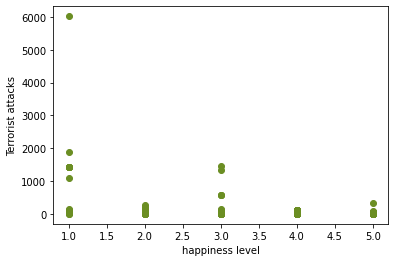

In [14]:
plt.ylabel("Terrorist attacks")
plt.xlabel("happiness level")
plt.title("")
plt.scatter(full_train['happiness_level'], full_train['Terrorist_attacks'], c = 'olivedrab')
plt.show()

There are clear differences in average happiness levels among countries in different regions. This variable should stay in.

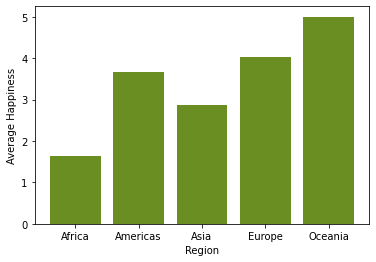

In [15]:
grouped = full_train.groupby('region', as_index=False)['happiness_level'].mean()

plt.ylabel("Average Happiness")
plt.xlabel("Region")
plt.title("")
plt.bar(grouped['region'], grouped['happiness_level'],color='olivedrab')
plt.show()

Sub region also clearly affects happiness level, so it will also be used in my model.

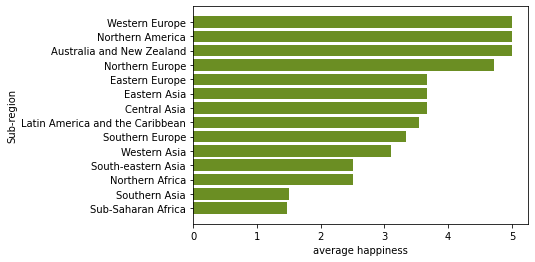

In [16]:
grouped = full_train.groupby('sub-region', as_index=False)['happiness_level'].mean()
grouped = grouped.sort_values('happiness_level')

plt.ylabel("Sub-region")
plt.xlabel("average happiness")
plt.title("")
plt.barh(grouped['sub-region'], grouped['happiness_level'], color = 'olivedrab')
plt.show()

#Examine features that predict happiness categories using one or more models that allow for automatic feature selection
Explain any meaningful findings


I'm going to use Lasso regression to get important features. It's going to be a regression to predict the happiness level variable I made (treating it as a continuous numeric variable). This won't be exactly what is predicted in the other models, but doing it this way makes it easier I think to find important features. I do think doing this is more meaningful in some ways than treating the happiness variable as a categorical variablele. 

In [17]:
dummies1 = pd.get_dummies(full_train['sub-region'], prefix='sub-region')
dummies2 = pd.get_dummies(full_train['region'], prefix='region')

In [18]:
final_df = full_train.join(dummies1).join(dummies2)

In [19]:
final_df.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks', 'Average', 'High', 'Low', 'Very High', 'Very Low',
       'happiness', 'happiness_level', 'sub-region_Australia and New Zealand',
       'sub-region_Central Asia', 'sub-region_Eastern Asia',
       'sub-region_Eastern Europe',
       'sub-region_Latin America and the Caribbean',
       'sub-region_Northern Africa', 'sub-region_Northern America',
       'sub-region_Northern Europe', 'sub-region_South-eastern Asia',
       'sub-region_Southern Asia', 'sub-region_Southern Europe',
       'sub-region_Sub-Saharan Africa', 'sub-region_Western Asia',
       'sub-region_Western Europe', 'region_Africa', 'region_Americas',
       'region_Asia', 'region_Europe', 'region_Oceania'],
      dtype='object')

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

lasso_X = final_df.drop(['happiness_level','name','Country or region',
                         'sub-region','region','happiness','Average','High',
                         'Low','Very High','Very Low'], axis=1)
lasso_y = final_df['happiness_level']

lasso_pipe = make_pipeline(StandardScaler(), Lasso(max_iter=100000))

param_grid = {'lasso__alpha': [0.0001, 0.001,0.01, 0.1, 1, 10,100]}

grid = GridSearchCV(lasso_pipe, param_grid, cv=10)
grid.fit(lasso_X, lasso_y)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_.named_steps.lasso.coef_)

lasso_coefs = grid.best_estimator_.named_steps.lasso.coef_

{'lasso__alpha': 0.1}
0.6883208475421112
[ 0.59302119  0.11429074  0.23700467  0.18940966  0.          0.
 -0.          0.          0.03101432  0.          0.          0.
 -0.          0.          0.04692362 -0.05335447 -0.08900801 -0.
 -0.         -0.          0.03621395 -0.05190975  0.10884889 -0.
  0.05705371  0.        ]


In [21]:
comp = pd.DataFrame(lasso_X.columns, index=lasso_X.columns)

comp["lasso"] = lasso_coefs
comp[abs(comp["lasso"])>0].sort_values(by='lasso',ascending = False)

,0,lasso
GDP per capita,GDP per capita,0.593021
Healthy life expectancy,Healthy life expectancy,0.237005
Freedom to make life choices,Freedom to make life choices,0.189410
Social support,Social support,0.114291
region_Americas,region_Americas,0.108849
region_Europe,region_Europe,0.057054
sub-region_Northern Europe,sub-region_Northern Europe,0.046924
sub-region_Western Europe,sub-region_Western Europe,0.036214
sub-region_Central Asia,sub-region_Central Asia,0.031014
region_Africa,region_Africa,-0.051910


In [22]:
comp[abs(comp["lasso"])>0].index

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'sub-region_Central Asia',
       'sub-region_Northern Europe', 'sub-region_South-eastern Asia',
       'sub-region_Southern Asia', 'sub-region_Western Europe',
       'region_Africa', 'region_Americas', 'region_Europe'],
      dtype='object')

I'm not surprised to find that GDP per capita is the most important feature here, as it was evident from the visualization that it was highly correlated with happiness. Same goes for healhty life expectancy. It's interesting that freedom to make life choices is ranked slightly higher than social support, based on the visualizations I wouldn't have expected that. It makes sense that terrorist attacks and perception of corruption are not included in this model, as it didn't appear that there was a relationship between those and happiness based on the visualizations. I'm also not surprised to see that some regions and subregions are included in the model, as there did appear to be significant differences across those.

Now because I'm interseted, I'm going to do the same as above but using logistic regression with L1 penalty to predict the happiness variable as a categorical variable. I'm wondering if the features chosen will differ greatly.

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression


l1_X = final_df.drop(['happiness_level','name','Country or region',
                         'sub-region','region','happiness','Average','High',
                         'Low','Very High','Very Low'], axis=1)
l1_y = final_df['happiness']

l1_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver = 'liblinear', max_iter = 100000))

param_grid = {
    'logisticregression__C': [0.0001, 0.001,0.01, 0.1, 1, 10,100,1000]
    }

grid = GridSearchCV(l1_pipe, param_grid, cv=10)
grid.fit(l1_X, l1_y)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_.named_steps.logisticregression.coef_)

l1_coefs = grid.best_estimator_.named_steps.logisticregression.coef_

{'logisticregression__C': 1}
0.5805555555555555
[[ 0.         -0.00415298  0.         -0.183252   -0.09742248 -0.11643614
   0.          0.          0.12486822  0.06896341  0.2516206   0.
   0.56830061  0.         -0.15695706  0.11253673 -0.2933524   0.61487088
  -0.22851293  0.         -0.07148932  0.          0.          0.28430276
   0.          0.        ]
 [ 0.20067125  1.26403703  0.78959083  0.4321775  -0.59317131 -0.60475928
   0.         -0.00526337  0.44390193  0.17810509  0.3449052   0.6123502
   0.         -0.07569814  0.          0.27260956 -0.02326278  0.
   0.          0.         -0.42802453  0.          0.          0.20058598
   0.         -0.01407144]
 [-0.02908921  0.         -0.03467741  0.         -0.50536345 -0.68571785
  -1.05967747  0.          0.         -0.1041941  -0.30549566  0.
  -0.0784735   0.          0.          0.47405928  0.6749489   0.
   0.90427413  0.49050123  0.          0.          0.          0.
  -0.01806054  0.        ]
 [ 1.94667947  0.       

In [24]:
grid.classes_

array(['Average', 'High', 'Low', 'Very High', 'Very Low'], dtype=object)

I didn't realize that the model would choose separate feature importances for each happiness category. Interesting. 

In [25]:
l1_coefs[0]

comp_l1 = pd.DataFrame(l1_X.columns, index=l1_X.columns)

comp_l1["average"] = l1_coefs[0]
comp_l1["high"] = l1_coefs[1]
comp_l1["low"] = l1_coefs[2]
comp_l1["very high"] = l1_coefs[3]
comp_l1["very low"] = l1_coefs[4]

comp_l1
#comp[abs(comp["lasso"])>0].sort_values(by='lasso',ascending = False)

,0,average,high,low,very high,very low
GDP per capita,GDP per capita,0.000000,0.200671,-0.029089,1.946679,-1.460968
Social support,Social support,-0.004153,1.264037,0.000000,0.000000,-0.283018
Healthy life expectancy,Healthy life expectancy,0.000000,0.789591,-0.034677,0.000000,0.000000
Freedom to make life choices,Freedom to make life choices,-0.183252,0.432178,0.000000,0.070125,-0.255024
Generosity,Generosity,-0.097422,-0.593171,-0.505363,1.269094,0.215134
Perceptions of corruption,Perceptions of corruption,-0.116436,-0.604759,-0.685718,0.662020,0.338479
Terrorist_attacks,Terrorist_attacks,0.000000,0.000000,-1.059677,0.000000,1.043081
sub-region_Australia and New Zealand,sub-region_Australia and New Zealand,0.000000,-0.005263,0.000000,0.000000,0.000000
sub-region_Central Asia,sub-region_Central Asia,0.124868,0.443902,0.000000,0.000000,-0.109101
sub-region_Eastern Asia,sub-region_Eastern Asia,0.068963,0.178105,-0.104194,0.000000,0.000000


Interesting how each category has such different important features. Makes me think that it's best to just go with including every feature to start with.

#Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models):

1.   Submit three models to the model share leaderboard before you start communicating with your team.
2.   After you submit your first three models, describe your best model with your team via your team slack channel
3. Fit and submit up to three more models after learning from your team.
4. Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.
5. Submit your best models to the leaderboard for the World Happiness AI Model Share competition.
6. 
You have the option to present and/or discuss these models in your report, but it is not required.



## 1. Submit three models to the model share leaderboard before you start communicating with your team

The first model I submitted was a support vector machine without any grid search that had been my best performing modelf rom the Titanic data challenge. I didn't change the preprocessor at all. I just wanted to see how it would do without making any changes.

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region',], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [27]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [28]:
from sklearn.svm import SVC

svec = SVC(class_weight='balanced',C=5)

param_grid = {
              }

svec_pipe = make_pipeline(svec)
kfold = KFold(n_splits=4)
grid = GridSearchCV(svec_pipe, param_grid, cv=kfold)

grid.fit(preprocessor(X_train), y_train_labels)

print("Parameters chosen:",grid.best_params_)
print("Cross validation score: {:.4f}".format(grid.best_score_))
grid.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

Parameters chosen: {}
Cross validation score: 0.5795


0.9318181818181818

The model is clearly overfit based on the overall accuracy vs. the cross-validation score. I submitted it to the leaderboard and it actually did surprisingly well compared to other models. This is model #14

### Keras
I tried out using a keras model and submitted that as #67. It didn't perform very well.

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(24, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(12, activation='relu'))
keras_model.add(Dense(12, activation='relu'))
keras_model.add(Dense(16, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 30, 
               epochs = 300, validation_split=0.5)  

Epoch 1/300
2/2 [==============================] - 1s 307ms/step - loss: 1.6146 - accuracy: 0.1364 - val_loss: 1.5628 - val_accuracy: 0.2500
Epoch 2/300
2/2 [==============================] - 0s 37ms/step - loss: 1.6115 - accuracy: 0.1364 - val_loss: 1.5609 - val_accuracy: 0.2500
Epoch 3/300
2/2 [==============================] - 0s 37ms/step - loss: 1.6079 - accuracy: 0.1591 - val_loss: 1.5594 - val_accuracy: 0.2500
Epoch 4/300
2/2 [==============================] - 0s 42ms/step - loss: 1.6049 - accuracy: 0.1591 - val_loss: 1.5581 - val_accuracy: 0.2727
Epoch 5/300
2/2 [==============================] - 0s 43ms/step - loss: 1.6021 - accuracy: 0.1591 - val_loss: 1.5568 - val_accuracy: 0.2955
Epoch 6/300
2/2 [==============================] - 0s 36ms/step - loss: 1.5990 - accuracy: 0.1591 - val_loss: 1.5548 - val_accuracy: 0.3182
Epoch 7/300
2/2 [==============================] - 0s 66ms/step - loss: 1.5960 - accuracy: 0.2045 - val_loss: 1.5530 - val_accuracy: 0.3182
Epoch 8/300
2/2 [==

### SVM with gridsearch
Next I tried using gridsearch to tune hyperparameters for a support vector machine:

In [30]:
from sklearn.svm import SVC

svec = SVC(class_weight='balanced')

param_grid = {'svc__C': [1,4,3,4,5],
              'svc__gamma': [.0001, .001, 0.01,.005,.02 ],
              'svc__kernel': ['linear','poly','rbf']
              }

svec_pipe = make_pipeline(svec)
kfold = KFold(n_splits=8)
grid = GridSearchCV(svec_pipe, param_grid, cv=kfold)

grid.fit(preprocessor(X_train), y_train_labels)

print("Parameters chosen:",grid.best_params_)
print("Cross validation score: {:.4f}".format(grid.best_score_))
grid.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

Parameters chosen: {'svc__C': 4, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Cross validation score: 0.6932


0.7613636363636364

This was much less overfit, and actually seems to predict pretty well compared to the other models. The hyperparameter C changed slightly from 5 to 4 and gamma was .01. This indicates that I submitted it as model #108 but it didn't perfom well on the test data :(

I also tried a number of gradientboosting and bagging models, also more svms with a wider range of hyper-parameters to tune and none of these performed as well as the first model I tried. 

## 2. Learning from team
A teammate had some luck with a random forest model. It didn't do as well as my first model but did better than my other models. Perhaps I can try random forest for myself with updates to the preprocessor based on the feature selection I did with the lasso regression?

In [31]:
def preprocessor(data):
    dummies1 = pd.get_dummies(data['sub-region'], prefix='sub-region')
    dummies2 = pd.get_dummies(data['region'], prefix='region')
    final_df = data.join(dummies1).join(dummies2)
    preprocessed_data = final_df[['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'sub-region_Central Asia',
       'sub-region_Northern Europe', 'sub-region_South-eastern Asia',
       'sub-region_Southern Asia', 'sub-region_Western Europe',
       'region_Africa', 'region_Americas', 'region_Europe']]
    return preprocessed_data

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features = 'sqrt', random_state=122)

rf_pipe = make_pipeline(StandardScaler(),rf)

kfold = KFold(n_splits=8)

param_grid = {'randomforestclassifier__n_estimators': [100],
              'randomforestclassifier__max_depth': np.arange(5, 55, 5)
             }

grid = GridSearchCV(rf_pipe, param_grid, cv=kfold)

grid.fit(preprocessor(X_train), y_train_labels)

print("Parameters chosen:",grid.best_params_)
print("Cross validation score: {:.4f}".format(grid.best_score_))
grid.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

Parameters chosen: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Cross validation score: 0.6364


1.0

The model is definitely overfit but didn't perform badly on cross-validation, I'll submitted it to the leaderboard as model #409. Unfortunately, it didn't perform very well on the test data!

I'm going to also try the new preprocessor with the SVM with gridsearch.

In [33]:
from sklearn.svm import SVC

svec = SVC(class_weight='balanced')

param_grid = {
             'svc__C': [1,4,3,4,5],
             'svc__gamma': [.0001, .001, 0.01,.005,.02 ]
              }

svec_pipe = make_pipeline(StandardScaler(),svec)
kfold = KFold(n_splits=8)
grid = GridSearchCV(svec_pipe, param_grid, cv=kfold)

grid.fit(preprocessor(X_train), y_train_labels)

print("Parameters chosen:",grid.best_params_)
print("Cross validation score: {:.4f}".format(grid.best_score_))
grid.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

Parameters chosen: {'svc__C': 5, 'svc__gamma': 0.01}
Cross validation score: 0.5909


0.7045454545454546

I submitted as model #420 and it didn't perform well either. Oh well. 

The last thing I tried was gradient boosting with the same preprocessing as the others. I submitted this model as #691.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier


param = {'gradientboostingclassifier__n_estimators': [100,200],
          'gradientboostingclassifier__max_depth': np.arange(1, 10, 1)
              }

kfold = KFold(n_splits=4)

grid_pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=0))

grid = GridSearchCV(grid_pipe,param, cv=kfold)

grid.fit(preprocessor(X_train), y_train_labels)

print("Parameters chosen:",grid.best_params_)
print("Cross validation score: {:.4f}".format(grid.best_score_))
grid.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

Parameters chosen: {'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 100}
Cross validation score: 0.5909


0.9204545454545454

Again, this model was pretty overfit and performed similarly to the others on cross-validation. The max depth chosen was 1 with 100 estimators. The model also didn't perform very well on the test data. 

Based on the size of the dataset and the limited number of varialbes, I think it kind of comes down to luck with which models worked the best here. Even though certain models performed better with cross-validation, this didn't really have an impact on how well they did on the test data. The hyperparameter values didn't honestly change much between SVM models, and all models generally performed similarly despite having different hyperparameters. Perhaps if I had more time and really wanted to dig into this I would increase the range of my grid searches.

I could have tried to add additional country-level variables from alternate data sources, but ultimately I ran out of time. If I have time to come back to this project I would definitely look at some potential variables maybe to do with sunlight hours, nutrition, or fertility rate.